In [1]:
from scipy.optimize import minimize
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Hàm mục tiêu
def objective_function(vars):
    x, y, lambda1, lambda2 = vars
    return x**2 + y**2 - 4*x - 6*y + lambda1*(x + y - 3) + lambda2*(-2*x + y - 2)

# Hệ ràng buộc
def constraint1(vars):
    x, y, _, _ = vars 
    return x + y - 3

def constraint2(vars):
    x, y, _, _ = vars 
    return -2*x + y - 2

# Điều kiện KKT
def kkt_conditions(vars):
    x, y, lambda1, lambda2 = vars 
    
    # Stationarity
    stationarity = [2*x - 4 + lambda1 - 2*lambda2,
                    2*y - 6 + lambda1 + lambda2,
                    x + y - 3,
                    -2*x + y - 2]
    
    # Primal feasibility
    primal_feasibility = [constraint1(vars),
                          constraint2(vars)]
    
    # Dual feasibility
    dual_feasibility = [lambda1, lambda2]
    
    # Complementary slackness
    complementary_slackness = [lambda1 * constraint1(vars),
                               lambda2 * constraint2(vars)]
    
    return stationarity + primal_feasibility + dual_feasibility + complementary_slackness

# Điểm xuất phát
initial_guess = [0, 0, 0, 0]

# Ràng buộc
constraints = [{'type': 'eq', 'fun': constraint1},
               {'type': 'eq', 'fun': constraint2}]

# Giải bài toán tối ưu
result = minimize(objective_function, initial_guess, constraints=constraints)

# Hiển thị kết quả
print(f'Giá trị cực tiểu: {result.fun}')
print(f'Điểm cực tiểu: {result.x[:2]}')
kkt_result = kkt_conditions(result.x)

# Hiển thị kết quả Kiểm tra KKT
if all(condition <= 1e-6 for condition in kkt_result):
    print("Giải pháp thỏa mãn điều kiện KKT.")
else:
    print("Giải pháp không thỏa mãn điều kiện KKT.")

Giá trị cực tiểu: -10.111111111111107
Điểm cực tiểu: [0.33333333 2.66666667]
Giải pháp không thỏa mãn điều kiện KKT.


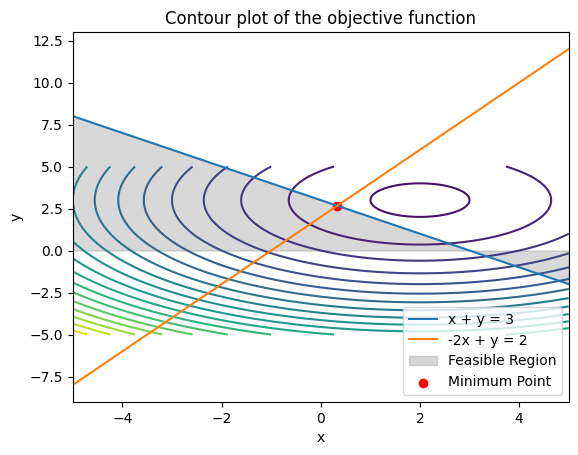

In [3]:
# Vẽ đồ thị
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = objective_function([X, Y, 0, 0])

plt.contour(X, Y, Z, levels=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of the objective function')

# Vẽ ràng buộc
x_vals_constraint = np.linspace(-5, 5, 100)
y_vals_constraint1 = 3 - x_vals_constraint
y_vals_constraint2 = 2*x_vals_constraint + 2

plt.plot(x_vals_constraint, y_vals_constraint1, label='x + y = 3')
plt.plot(x_vals_constraint, y_vals_constraint2, label='-2x + y = 2')
plt.fill_between(x_vals_constraint, y_vals_constraint1, color='gray', alpha=0.3, label='Feasible Region')

# Đánh dấu điểm cực tiểu
plt.scatter(result.x[0], result.x[1], color='red', label='Minimum Point')

plt.legend()
plt.show()

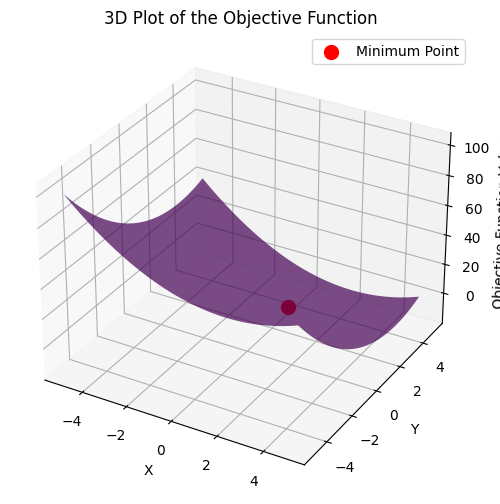

In [4]:
# Vẽ đồ thị 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Tạo các giá trị x, y
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Tính giá trị z (hàm mục tiêu) tương ứng
Z = objective_function([X, Y, 0, 0])

# Vẽ đồ thị hàm mục tiêu
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, rstride=100, cstride=100)

# Vẽ các điểm và giá trị tương ứng
ax.scatter(result.x[0], result.x[1], result.fun, color='red', s=100, label='Minimum Point')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Objective Function Value')
ax.set_title('3D Plot of the Objective Function')

plt.legend()
plt.show()

In [5]:
import numpy as np
from scipy.optimize import minimize

# Hàm mục tiêu
def objective_function(vars):
    x, y, z, lambda1, lambda2 = vars
    return 3000*x + 2000*y + 2500*z + lambda1*(0.04*x + 0.06*y + 0.05*z - 500) + lambda2*(0.07*x + 0.02*z - 300)

# Hệ ràng buộc
def constraint1(vars):
    x, y, z, _, _ = vars 
    return 0.04*x + 0.06*y + 0.05*z - 500

def constraint2(vars):
    x, y, z, _, _ = vars 
    return 0.07*x + 0.02*z - 300

# Điều kiện KKT
def kkt_conditions(vars):
    x, y, z, lambda1, lambda2 = vars 
    
    # Stationarity
    stationarity = [3000*x + 0.04*lambda1 + 0.07*lambda2,
                    2000*y + 0.06*lambda1,
                    2500*z + 0.05*lambda1 + 0.02*lambda2,
                    0.04*x + 0.06*y + 0.05*z - 500,
                    0.07*x + 0.02*z - 300]
    
    # Primal feasibility
    primal_feasibility = [constraint1(vars),
                          constraint2(vars)]
    
    # Dual feasibility
    dual_feasibility = [lambda1, lambda2]
    
    # Complementary slackness
    complementary_slackness = [lambda1 * constraint1(vars),
                               lambda2 * constraint2(vars)]
    
    return stationarity + primal_feasibility + dual_feasibility + complementary_slackness

# Điểm xuất phát
initial_guess = [0, 0, 0, 0, 0]

# Ràng buộc
constraints = [{'type': 'eq', 'fun': constraint1},
               {'type': 'eq', 'fun': constraint2}]

# Giải bài toán tối ưu
result = minimize(objective_function, initial_guess, constraints=constraints)

# Hiển thị kết quả
print(f'Giá trị cực tiểu: {result.fun}')
print(f'Nghiệm cực tiểu: {result.x[:3]}')
kkt_result = kkt_conditions(result.x)

# Hiển thị kết quả Kiểm tra KKT
if all(condition <= 1e-6 for condition in kkt_result):
    print("Giải pháp thỏa mãn điều kiện KKT.")
else:
    print("Giải pháp không thỏa mãn điều kiện KKT.")

Giá trị cực tiểu: -3084869250532.484
Nghiệm cực tiểu: [ 1.22679149e+08  2.55692571e+08 -4.10079728e+08]
Giải pháp không thỏa mãn điều kiện KKT.


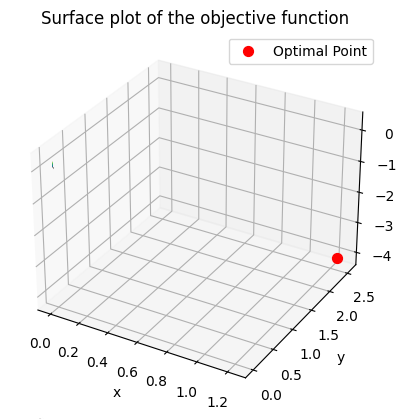

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Hàm mục tiêu
def objective_function(vars):
    x, y, z, lambda1, lambda2 = vars
    return 3000*x + 2000*y + 2500*z + lambda1*(0.04*x + 0.06*y + 0.05*z - 500) + lambda2*(0.07*x + 0.02*z - 300)

# Vẽ đồ thị 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = np.linspace(0, 5000, 100)
y_vals = np.linspace(0, 5000, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = objective_function([X, Y, 0, 0, 0])

ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface plot of the objective function')

# Đánh dấu điểm tối ưu
result = [result.x[0], result.x[1], result.x[2]]
x_opt, y_opt, z_opt = result
ax.scatter(x_opt, y_opt, z_opt, color='red', s=50, label='Optimal Point')

ax.legend()
plt.show()

In [7]:
def objective_function(vars):
    x, y, z, lambda1, lambda2, lambda3 = vars
    return 260*x + 120*y + 600*z + lambda1*(2*x + y + 3*z - 500) + lambda2*(100*x + 40*y + 250*z - 40000) + lambda3*(6*x - y)

# Hệ ràng buộc
def constraint1(vars):
    x, y, z, _, _, _ = vars 
    return 2*x + y + 3*z - 500

def constraint2(vars):
    x, y, z, _, _, _ = vars  
    return 100*x + 40*y + 250*z - 40000

def constraint3(vars):
    x, y, z, _, _, _ = vars  
    return 6*x - y

# Điều kiện KKT
def kkt_conditions(vars):
    x, y, z, lambda1, lambda2, lambda3 = vars 
    
    # Stationarity
    stationarity = [260 + 2*lambda1 + 100*lambda2 + 6*lambda3,
                    120 + lambda1 + 40*lambda2 - lambda3,
                    600 + 3*lambda1 + 250*lambda2,
                    2*x + y + 3*z - 500,
                    100*x + 40*y + 250*z - 40000,
                    6*x - y]
    
    # Primal feasibility
    primal_feasibility = [constraint1(vars),
                          constraint2(vars),
                          constraint3(vars)]
    
    # Dual feasibility
    dual_feasibility = [lambda1, lambda2, lambda3]
    
    # Complementary slackness
    complementary_slackness = [lambda1 * constraint1(vars),
                               lambda2 * constraint2(vars),
                               lambda3 * constraint3(vars)]
    
    return stationarity + primal_feasibility + dual_feasibility + complementary_slackness

# Điểm xuất phát
initial_guess = [0, 0, 0, 0, 0, 0]

# Ràng buộc
constraints = [{'type': 'eq', 'fun': constraint1},
               {'type': 'eq', 'fun': constraint2},
               {'type': 'eq', 'fun': constraint3}]

# Giải bài toán tối ưu
result = minimize(objective_function, initial_guess, constraints=constraints)

# Hiển thị kết quả
print(f'Giá trị cực tiểu: {result.fun}')
print(f'Điểm cực tiểu: {result.x[:3]}')
# Hiển thị kết quả Kiểm tra KKT
if all(condition <= 1e-6 for condition in kkt_result):
    print("Giải pháp thỏa mãn điều kiện KKT.")
else:
    print("Giải pháp không thỏa mãn điều kiện KKT.")

Giá trị cực tiểu: 96836.73469387759
Điểm cực tiểu: [  5.10204082  30.6122449  153.06122449]
Giải pháp không thỏa mãn điều kiện KKT.


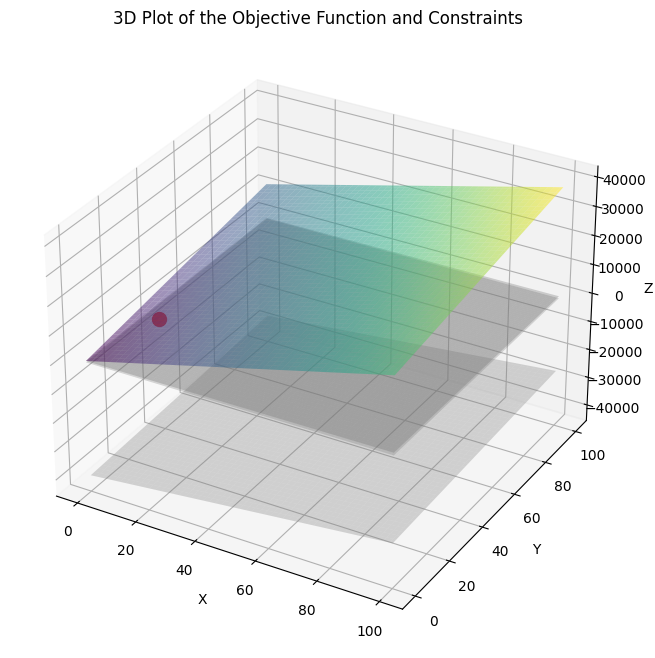

In [10]:
# Tạo dữ liệu
x_vals = np.linspace(0, 100, 100)
y_vals = np.linspace(0, 100, 100)

X, Y = np.meshgrid(x_vals, y_vals)
Z = objective_function([X, Y, 0, 0, 0, 0])
Constraint1 = constraint1([X, Y, 0, 0, 0, 0])
Constraint2 = constraint2([X, Y, 0, 0, 0, 0])
Constraint3 = constraint3([X, Y, 0, 0, 0, 0])

# Vẽ đồ thị
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Hàm mục tiêu
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5, label='Objective Function')

# Ràng buộc
ax.plot_surface(X, Y, Constraint1, color='gray', alpha=0.3, label='Constraint 1')
ax.plot_surface(X, Y, Constraint2, color='gray', alpha=0.3, label='Constraint 2')
ax.plot_surface(X, Y, Constraint3, color='gray', alpha=0.3, label='Constraint 3')

# Đánh dấu điểm cực tiểu
ax.scatter(result.x[0], result.x[1], result.x[2], color='red', s=100, label='Minimum Point')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of the Objective Function and Constraints')
# ax.legend()

plt.show()